In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime as dt
import pickle
import geopandas
#import altair as alt

In [2]:
trip_data_june = pd.read_csv('./Data/june_trip.csv')
trip_data_june .head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01 00:00:00,00:02:18.203333,2019-06-01 00:00:00,00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01 00:00:00,00:09:56,2019-06-01 00:00:00,00:21:56,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01 00:00:00,00:10:31.163333,2019-06-01 00:00:00,00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01 00:00:00,00:07:21.430000,2019-06-01 00:00:00,00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000


In [3]:
trip_data_june.shape

(205627, 16)

In [4]:
trip_data_june.dtypes

pubTimeStamp       object
companyName        object
tripRecordNum      object
sumdID             object
tripDuration      float64
tripDistance      float64
startDate          object
startTime          object
endDate            object
endTime            object
startLatitude     float64
startLongitude    float64
endLatitude       float64
endLongitude      float64
tripRoute          object
create_dt          object
dtype: object

In [5]:
from datetime import datetime

In [6]:
trip_data_june['pubTimeStamp'] = pd.to_datetime(trip_data_june['pubTimeStamp'])

In [7]:
trip_data_june.info

<bound method DataFrame.info of                   pubTimeStamp    companyName tripRecordNum  \
0      2019-06-01 00:05:46.817           Bird       BRD3572   
1      2019-06-01 00:05:46.817           Bird       BRD3571   
2      2019-06-01 00:09:54.000         Gotcha          GOT1   
3      2019-06-01 00:10:46.957           Bird       BRD3610   
4      2019-06-01 00:10:46.957           Bird       BRD3612   
5      2019-06-01 00:10:46.957           Bird       BRD3611   
6      2019-06-01 00:10:46.957           Bird       BRD3614   
7      2019-06-01 00:10:46.957           Bird       BRD3613   
8      2019-06-01 00:10:46.957           Bird       BRD3615   
9      2019-06-01 00:12:04.230           SPIN          SPI5   
10     2019-06-01 00:15:47.313           Bird       BRD3645   
11     2019-06-01 00:15:47.313           Bird       BRD3654   
12     2019-06-01 00:15:47.313           Bird       BRD3655   
13     2019-06-01 00:15:47.313           Bird       BRD3651   
14     2019-06-01 00:15

In [9]:
list(trip_data_june.companyName.unique())

['Bird', 'Gotcha', 'SPIN', 'Bolt Mobility', 'Lime', 'Lyft', 'JUMP']

In [10]:
trip_data_june.memory_usage(deep=True) * 1e-6

Index               0.000080
pubTimeStamp        1.645016
companyName        12.638824
tripRecordNum      13.089686
sumdID             15.313175
tripDuration        1.645016
tripDistance        1.645016
startDate          15.627652
startTime          14.013731
endDate            15.627652
endTime            14.013570
startLatitude       1.645016
startLongitude      1.645016
endLatitude         1.645016
endLongitude        1.645016
tripRoute         343.579632
create_dt          17.061161
dtype: float64

In [15]:
promise_gdf = gpd.read_file("MDHA_Promise_Zones/Export_Output_5.shp")
promise_gdf.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812291667 678044.5425000042,..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545416668 661791.3466666639,..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.543750003 668309.8885416687,..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.002708331 654974.6122916639,..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.743958339 692634.6387500018,..."


In [16]:
promise_gdf.geometry = promise_gdf.geometry.to_crs(epsg=4326)

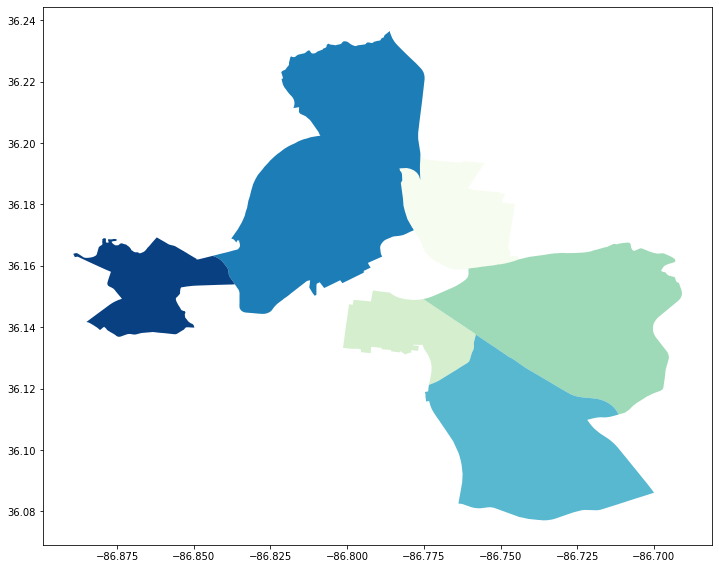

In [17]:
promise_gdf.plot(cmap="GnBu",figsize = (12, 12), column="ZONE_ID");

In [11]:
trip_data_june.columns

Index(['pubTimeStamp', 'companyName', 'tripRecordNum', 'sumdID',
       'tripDuration', 'tripDistance', 'startDate', 'startTime', 'endDate',
       'endTime', 'startLatitude', 'startLongitude', 'endLatitude',
       'endLongitude', 'tripRoute', 'create_dt'],
      dtype='object')

In [12]:
bird_june = trip_data_june.loc[trip_data_june.companyName == 0]

In [13]:
ax = promise_gdf.plot(cmap="GnBu", figsize = (40, 18))
bird_june.plot(ax = ax, column = 'chargelevel', legend = True);
plt.show();

NameError: name 'promise_gdf' is not defined

In [14]:
stat_data_june = pd.read_csv('./Data/june/june.csv')
stat_data_june.tail()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
28046090,2019-06-30 23:59:55.273000,36.125567,-86.776982,PoweredZYNSVOII2QSLD,Powered,100.0,scooter,0.15,Lime
28046091,2019-06-30 23:59:55.273000,36.121717,-86.775207,PoweredXOPAIWGL7SF62,Powered,93.0,scooter,0.15,Lime
28046092,2019-06-30 23:59:55.273000,36.127046,-86.777262,PoweredBYKFOWELGPKH6,Powered,61.0,scooter,0.15,Lime
28046093,2019-06-30 23:59:55.273000,36.123775,-86.790115,PoweredIAAQ7WODYXON7,Powered,35.0,scooter,0.15,Lime
28046094,2019-06-30 23:59:55.273000,36.121735,-86.775148,Powered3HJPPUNVYGL45,Powered,96.0,scooter,0.15,Lime


In [15]:
bird_june = stat_data_june.loc[stat_data_june.companyname == 0]

In [ ]:
ax = promise_gdf.plot(cmap="GnBu", figsize = (40, 18))
bird_june.plot(ax = ax, column = 'chargelevel', legend = True);
plt.show();

In [16]:
trip_data_june['sumdID'].value_counts()

Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2    1308
PoweredUNKNOWN                                 1120
PoweredOQ3DRY64KZBYS                            158
PoweredSQWMJWTIGM6DS                            158
Powered3ZPCHCTLNK2WR                            144
PoweredOQYNOUBQPNGUS                            139
Powered5QBZSLFMLMLQU                            135
PoweredOWWGOR5KA6ZLV                            133
Powered7UN7P27A5HR5H                            133
PoweredSJTYATG4FVICD                            133
PoweredMSUABN2YMDFWK                            132
Powered57NZJYNTN4KT4                            132
Powered3WD63MPJQERKZ                            131
PoweredZ4WPML62Z56WJ                            131
Powered2WZ4JPUCZFXN5                            131
PoweredIFJIBG3QHYXWB                            130
PoweredFOC4N7EUJUNHM                            130
PoweredLWRRVABRUKJZZ                            130
Powered2ZW44BAIKSF7F                            129
PoweredPC6QP

In [17]:
trip_data_june.columns

Index(['pubTimeStamp', 'companyName', 'tripRecordNum', 'sumdID',
       'tripDuration', 'tripDistance', 'startDate', 'startTime', 'endDate',
       'endTime', 'startLatitude', 'startLongitude', 'endLatitude',
       'endLongitude', 'tripRoute', 'create_dt'],
      dtype='object')

In [28]:
trip_data_june['tripRecordNum'].value_counts()

BOL00106     30
BOL00071     30
BOL00074     30
BOL00083     30
BOL00050     30
BOL00143     30
BOL00101     30
BOL00125     30
BOL00123     30
BOL00093     30
BOL00124     30
BOL00129     30
BOL00092     30
BOL00110     30
BOL00075     30
BOL00135     30
BOL00082     30
BOL00116     30
BOL00144     30
BOL00085     30
BOL00072     30
BOL00044     30
BOL00141     30
BOL00063     30
BOL00087     30
BOL00145     30
BOL00121     30
BOL00073     30
BOL00048     30
BOL00138     30
             ..
LIM780645     1
BRD8062       1
BRD10567      1
BRD10845      1
BRD10027      1
BRD8802       1
LIM780012     1
LIM781652     1
LIM784648     1
LIM782098     1
BRD9823       1
LIM779951     1
LIM783877     1
LIM780091     1
LIM781885     1
LIM784008     1
LIM781796     1
LIM781924     1
LIM780194     1
BRD8646       1
LIM780251     1
BRD11580      1
LFT2413       1
LIM779312     1
LIM779917     1
LIM783572     1
LIM783193     1
BRD8709       1
LIM781512     1
BRD10033      1
Name: tripRecordNum, Len

In [29]:
trip_data_june['companyName'].value_counts()

Lime             84728
Bird             55014
Lyft             37821
SPIN             14294
Bolt Mobility    10219
Gotcha            1803
JUMP              1748
Name: companyName, dtype: int64

In [18]:
trip_data_june['startDate',sort=True].value_counts()

SyntaxError: invalid syntax (<ipython-input-18-c9ef4ec83ca8>, line 1)

In [19]:
data2 = trip_data_june[trip_data_june['tripDistance'] > 9.84]

In [20]:
data2.tail(50)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
205574,2019-07-01 00:28:15.227,SPIN,SPI512,Powered6930923,27.000000,1981.627360,2019-06-30 00:00:00,23:57:57,2019-07-01 00:00:00,00:23:57,36.154935,-86.776887,36.152816,-86.783079,"[[36.15279,-86.78305],[36.1528162937948,-86.78...",2019-07-02 10:20:17.507000
205575,2019-07-01 00:29:28.000,Bolt Mobility,BOL00007,Powered-42343fcc-da6a-eac1-ab22-e6e31e320faf,1992.000000,13910.760000,2019-06-30 00:00:00,23:51:27,2019-07-01 00:00:00,00:24:39,36.153069,-86.789797,36.163346,-86.776345,"[[""36.153069"",""-86.789797""],[""36.153069"",""-86....",2019-07-02 06:16:21.830000
205576,2019-07-01 00:29:28.000,Bolt Mobility,BOL00006,Powered-a09d73c3-4980-5d69-b03e-a4dcaa3bbb10,2046.000000,13927.170000,2019-06-30 00:00:00,23:50:33,2019-07-01 00:00:00,00:24:39,36.153038,-86.789930,36.163270,-86.776303,"[[""36.153038"",""-86.789930""],[""36.152976"",""-86....",2019-07-02 06:16:21.800000
205577,2019-07-01 00:32:51.000,Bolt Mobility,BOL00009,Powered-4e5da7da-5a74-8a33-8347-7432a411c10e,3399.000000,13366.140000,2019-06-30 00:00:00,23:35:36,2019-07-01 00:00:00,00:32:15,36.149707,-86.812753,36.145974,-86.812040,[],2019-07-02 06:16:21.893000
205578,2019-07-01 00:33:15.397,SPIN,SPI507,Powered6849297,38.000000,4481.627440,2019-06-30 00:00:00,23:52:52,2019-07-01 00:00:00,00:30:29,36.146004,-86.809511,36.135663,-86.801322,"[[36.12766,-86.80361],[36.12752,-86.80374],[36...",2019-07-02 10:20:17.737000
205579,2019-07-01 00:33:15.397,SPIN,SPI511,Powered3320563,35.000000,2962.598520,2019-06-30 00:00:00,23:57:37,2019-07-01 00:00:00,00:32:25,36.152537,-86.790970,36.155821,-86.781774,"[[36.1558207,-86.7817737],[36.15648,-86.7823],...",2019-07-02 10:20:17.763000
205580,2019-07-01 00:33:15.397,SPIN,SPI508,Powered3400377,37.000000,4625.984400,2019-06-30 00:00:00,23:53:37,2019-07-01 00:00:00,00:30:23,36.146296,-86.809604,36.135609,-86.801167,"[[36.135608623769258,-86.80116710261143],[36.1...",2019-07-02 10:20:17.703000
205581,2019-07-01 00:33:15.397,SPIN,SPI505,Powered8606603,39.000000,4589.895160,2019-06-30 00:00:00,23:52:04,2019-07-01 00:00:00,00:30:10,36.146410,-86.809460,36.135690,-86.801331,"[[36.1356896089477,-86.80133063583547],[36.135...",2019-07-02 10:20:17.670000
205583,2019-07-01 00:43:15.880,SPIN,SPI502,Powered2269250,52.000000,2844.488280,2019-06-30 00:00:00,23:49:48,2019-07-01 00:00:00,00:41:34,36.148651,-86.807064,36.151578,-86.798121,"[[36.14761,-86.81241],[36.14773,-86.81253],[36...",2019-07-02 10:20:17.993000
205584,2019-07-01 00:43:15.880,SPIN,SPI503,Powered3208263,52.000000,2837.926600,2019-06-30 00:00:00,23:49:53,2019-07-01 00:00:00,00:41:51,36.148587,-86.807042,36.151387,-86.798063,"[[36.14924,-86.80407],[36.14916,-86.8042],[36....",2019-07-02 10:20:18.023000


In [21]:
data3 = data2[data2 ['tripDuration'] > 1]

In [22]:
data3.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-06-01 00:05:46.817,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01 00:00:00,00:02:18.203333,2019-06-01 00:00:00,00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000
1,2019-06-01 00:05:46.817,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
2,2019-06-01 00:09:54.000,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01 00:00:00,00:09:56,2019-06-01 00:00:00,00:21:56,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000
4,2019-06-01 00:10:46.957,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01 00:00:00,00:07:21.430000,2019-06-01 00:00:00,00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000
6,2019-06-01 00:10:46.957,Bird,BRD3614,Powered1PQQB,6.0,2296.588000,2019-06-01 00:00:00,00:06:11.906666,2019-06-01 00:00:00,00:12:34.403333,36.151600,-86.80210,36.151400,-86.802000,"[[36.151438,-86.801898],[36.151184,-86.802086]...",2019-06-02 05:30:20.410000


In [23]:
data3.shape

(172910, 16)

In [24]:
data4 = data3[data3 ['sumdID'] != 'PoweredUNKNOWN']

In [25]:
data4.shape

(172900, 16)

In [60]:
data4['sumdID'].value_counts()

Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2    1245
PoweredOQ3DRY64KZBYS                            151
PoweredSQWMJWTIGM6DS                            145
Powered3ZPCHCTLNK2WR                            140
PoweredOQYNOUBQPNGUS                            131
Powered5QBZSLFMLMLQU                            129
Powered7UN7P27A5HR5H                            129
PoweredOWWGOR5KA6ZLV                            126
Powered3WD63MPJQERKZ                            125
PoweredUD5AZXJ5UMT7B                            125
Powered2WZ4JPUCZFXN5                            125
PoweredC74KPQ5J3OJGK                            125
PoweredIFJIBG3QHYXWB                            124
Powered57NZJYNTN4KT4                            123
PoweredSJTYATG4FVICD                            123
PoweredMSUABN2YMDFWK                            123
PoweredPC6QPCO4BH7O3                            121
PoweredSDQ6GAHIJK5AF                            121
Powered2ZW44BAIKSF7F                            120
PoweredZ4WPM

In [26]:
data4.dtypes

pubTimeStamp      datetime64[ns]
companyName               object
tripRecordNum             object
sumdID                    object
tripDuration             float64
tripDistance             float64
startDate                 object
startTime                 object
endDate                   object
endTime                   object
startLatitude            float64
startLongitude           float64
endLatitude              float64
endLongitude             float64
tripRoute                 object
create_dt                 object
dtype: object

In [27]:
data4['startDate'] = pd.to_datetime(data4['startDate'])

C:\Users\shaju\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
data4.dtypes

pubTimeStamp      datetime64[ns]
companyName               object
tripRecordNum             object
sumdID                    object
tripDuration             float64
tripDistance             float64
startDate         datetime64[ns]
startTime                 object
endDate                   object
endTime                   object
startLatitude            float64
startLongitude           float64
endLatitude              float64
endLongitude             float64
tripRoute                 object
create_dt                 object
dtype: object

In [29]:
data4['startTime'] = pd.to_datetime(data4['startTime'])

C:\Users\shaju\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
data4['endDate'] = pd.to_datetime(data4['endDate'])

C:\Users\shaju\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
data4['endTime'] = pd.to_datetime(data4['endTime'])

C:\Users\shaju\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
data4.dtypes

pubTimeStamp      datetime64[ns]
companyName               object
tripRecordNum             object
sumdID                    object
tripDuration             float64
tripDistance             float64
startDate         datetime64[ns]
startTime         datetime64[ns]
endDate           datetime64[ns]
endTime           datetime64[ns]
startLatitude            float64
startLongitude           float64
endLatitude              float64
endLongitude             float64
tripRoute                 object
create_dt                 object
dtype: object

In [33]:
data4.sumdID.apply(str)

0                                         PoweredSPI1T
1                                         Powered2I3MS
2                                           Powered327
4                                         PoweredSPI1T
6                                         Powered1PQQB
7                                         PoweredEVLBD
8                                         PoweredB9WEF
9                                       Powered5000596
10                                        PoweredUKG5P
11                                        Powered23WB2
12                                        PoweredCBZVU
13                                        PoweredIIMK1
14                                        Powered5B4P8
16                                        Powered6EACV
17                                        PoweredL1I49
18                                        PoweredE8CPC
19                                        PoweredKJXK8
20                                        PoweredENXD9
21        

In [34]:
data5 = data4[data4 ['sumdID'] != 'PoweredUNKNOWN']

In [35]:
data5.shape


(172900, 16)

In [36]:
data5.dtypes

pubTimeStamp      datetime64[ns]
companyName               object
tripRecordNum             object
sumdID                    object
tripDuration             float64
tripDistance             float64
startDate         datetime64[ns]
startTime         datetime64[ns]
endDate           datetime64[ns]
endTime           datetime64[ns]
startLatitude            float64
startLongitude           float64
endLatitude              float64
endLongitude             float64
tripRoute                 object
create_dt                 object
dtype: object

In [37]:
data5.info

<bound method DataFrame.info of                   pubTimeStamp    companyName tripRecordNum  \
0      2019-06-01 00:05:46.817           Bird       BRD3572   
1      2019-06-01 00:05:46.817           Bird       BRD3571   
2      2019-06-01 00:09:54.000         Gotcha          GOT1   
4      2019-06-01 00:10:46.957           Bird       BRD3612   
6      2019-06-01 00:10:46.957           Bird       BRD3614   
7      2019-06-01 00:10:46.957           Bird       BRD3613   
8      2019-06-01 00:10:46.957           Bird       BRD3615   
9      2019-06-01 00:12:04.230           SPIN          SPI5   
10     2019-06-01 00:15:47.313           Bird       BRD3645   
11     2019-06-01 00:15:47.313           Bird       BRD3654   
12     2019-06-01 00:15:47.313           Bird       BRD3655   
13     2019-06-01 00:15:47.313           Bird       BRD3651   
14     2019-06-01 00:15:47.313           Bird       BRD3653   
16     2019-06-01 00:15:47.313           Bird       BRD3652   
17     2019-06-01 00:15

In [38]:
list(data5.tripRecordNum.unique())

['BRD3572',
 'BRD3571',
 'GOT1',
 'BRD3612',
 'BRD3614',
 'BRD3613',
 'BRD3615',
 'SPI5',
 'BRD3645',
 'BRD3654',
 'BRD3655',
 'BRD3651',
 'BRD3653',
 'BRD3652',
 'BRD3647',
 'BRD3646',
 'BRD3650',
 'BRD3649',
 'BOL00016',
 'BOL00014',
 'SPI8',
 'SPI7',
 'BRD3678',
 'BRD3685',
 'BRD3684',
 'BRD3689',
 'BRD3682',
 'BRD3681',
 'BRD3686',
 'BRD3688',
 'BRD3687',
 'BRD3680',
 'SPI13',
 'SPI15',
 'BRD3714',
 'BRD3719',
 'BRD3707',
 'BRD3709',
 'BRD3718',
 'BRD3720',
 'BRD3715',
 'BRD3710',
 'BRD3717',
 'BRD3708',
 'BRD3721',
 'BRD3712',
 'BRD3716',
 'BRD3713',
 'BRD3711',
 'BOL00023',
 'BOL00028',
 'BOL00027',
 'BOL00022',
 'BOL00029',
 'BOL00030',
 'SPI18',
 'SPI9',
 'SPI19',
 'BRD3738',
 'BRD3748',
 'BRD3750',
 'BRD3747',
 'BRD3749',
 'BRD3741',
 'BRD3753',
 'BRD3746',
 'BRD3744',
 'BRD3752',
 'BRD3745',
 'BRD3742',
 'BRD3751',
 'BRD3740',
 'SPI25',
 'SPI11',
 'BRD3775',
 'BRD3781',
 'BRD3779',
 'BRD3774',
 'BRD3773',
 'BRD3776',
 'BRD3777',
 'BRD3780',
 'BRD3778',
 'BOL00031',
 'SPI22',


In [39]:
data5['tripRecordNum'].value_counts()

BOL00124     30
BOL00135     30
BOL00084     30
BOL00110     30
BOL00086     30
BOL00069     30
BOL00072     30
BOL00125     30
BOL00075     30
BOL00143     30
BOL00073     30
BOL00083     30
BOL00101     30
BOL00138     30
BOL00116     30
BOL00093     30
BOL00074     30
BOL00071     30
BOL00048     30
BOL00044     30
BOL00129     30
BOL00145     30
BOL00085     30
BOL00082     30
BOL00144     30
BOL00133     29
BOL00157     29
BOL00146     29
BOL00036     29
BOL00105     29
             ..
LIM783992     1
LIM780285     1
BRD7062       1
LIM781208     1
LIM781630     1
LIM783664     1
LIM782255     1
LIM783694     1
LIM780363     1
LIM781678     1
LIM784199     1
BRD10186      1
BRD6779       1
BRD8310       1
LIM781124     1
LIM780483     1
BRD11036      1
LIM779742     1
LIM779710     1
BRD10556      1
BRD10295      1
BRD9620       1
LIM781058     1
LFT2631       1
LIM783950     1
LIM5432       1
LIM781381     1
LIM784121     1
BOL00751      1
LIM781600     1
Name: tripRecordNum, Len

In [78]:
print (data5)

                  pubTimeStamp    companyName tripRecordNum  \
0      2019-06-01 00:05:46.817           Bird       BRD3572   
1      2019-06-01 00:05:46.817           Bird       BRD3571   
2      2019-06-01 00:09:54.000         Gotcha          GOT1   
4      2019-06-01 00:10:46.957           Bird       BRD3612   
6      2019-06-01 00:10:46.957           Bird       BRD3614   
7      2019-06-01 00:10:46.957           Bird       BRD3613   
8      2019-06-01 00:10:46.957           Bird       BRD3615   
9      2019-06-01 00:12:04.230           SPIN          SPI5   
10     2019-06-01 00:15:47.313           Bird       BRD3645   
11     2019-06-01 00:15:47.313           Bird       BRD3654   
12     2019-06-01 00:15:47.313           Bird       BRD3655   
13     2019-06-01 00:15:47.313           Bird       BRD3651   
14     2019-06-01 00:15:47.313           Bird       BRD3653   
16     2019-06-01 00:15:47.313           Bird       BRD3652   
17     2019-06-01 00:15:47.313           Bird       BRD

In [81]:
data6 = data5[data5 ['startDate'] == '2019-06-06']

In [82]:
data6.shape

(6466, 16)

In [83]:
data6.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
41052,2019-06-06 00:05:45.320,Lyft,LFT7,Powered296432,2.130317,1318.89768,2019-06-06,2019-09-07 00:03:37.333333,2019-06-06,2019-09-07 00:05:45.150000,36.177140,-86.746300,36.177390,-86.750580,"[[36.17714,-86.7463],[36.17716,-86.74643],[36....",2019-06-07 08:34:47.760000
41053,2019-06-06 00:06:18.317,Bird,BRD2661,PoweredNWHJF,8.000000,328.08400,2019-06-06,2019-09-07 00:00:12.120000,2019-06-06,2019-09-07 00:07:48.943333,36.162600,-86.790900,36.163200,-86.791300,"[[36.163091,-86.791285],[36.163541,-86.791306]...",2019-06-07 05:30:27.323000
41059,2019-06-06 00:06:18.317,Bird,BRD2660,Powered6HE1U,6.000000,984.25200,2019-06-06,2019-09-07 00:01:33.023333,2019-06-06,2019-09-07 00:07:39.026666,36.163300,-86.779800,36.163800,-86.777000,"[[36.163337,-86.779516],[36.16367,-86.779839],...",2019-06-07 05:30:27.290000
41066,2019-06-06 00:11:20.270,SPIN,SPI3,Powered3047571,6.000000,3202.09984,2019-06-06,2019-09-07 00:02:16.000000,2019-06-06,2019-09-07 00:07:53.000000,36.163540,-86.791175,36.158734,-86.782084,"[[36.158734288313852,-86.782084060926138],[36....",2019-06-07 09:07:40.490000
41068,2019-06-06 00:11:20.270,SPIN,SPI2,Powered4091927,7.000000,2391.73236,2019-06-06,2019-09-07 00:01:52.000000,2019-06-06,2019-09-07 00:08:01.000000,36.151335,-86.780279,36.157770,-86.778755,"[[36.15776974183612,-86.778754667224874],[36.1...",2019-06-07 09:07:40.523000


In [84]:
data5['sumdID'].value_counts()

Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2    1245
PoweredOQ3DRY64KZBYS                            151
PoweredSQWMJWTIGM6DS                            145
Powered3ZPCHCTLNK2WR                            140
PoweredOQYNOUBQPNGUS                            131
Powered5QBZSLFMLMLQU                            129
Powered7UN7P27A5HR5H                            129
PoweredOWWGOR5KA6ZLV                            126
Powered3WD63MPJQERKZ                            125
PoweredUD5AZXJ5UMT7B                            125
Powered2WZ4JPUCZFXN5                            125
PoweredC74KPQ5J3OJGK                            125
PoweredIFJIBG3QHYXWB                            124
Powered57NZJYNTN4KT4                            123
PoweredSJTYATG4FVICD                            123
PoweredMSUABN2YMDFWK                            123
PoweredPC6QPCO4BH7O3                            121
PoweredSDQ6GAHIJK5AF                            121
Powered2ZW44BAIKSF7F                            120
PoweredZ4WPM

In [60]:
data5.loc[data5.sumdID == 'Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619
' ]
data6 = data5.loc[data5.sumdID == 'Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619
' ]
data6.groupby(data6.pubTimeStamp.dt.day).count()

SyntaxError: EOL while scanning string literal (<ipython-input-60-1186ea798529>, line 1)

In [40]:
data5.loc[data5.sumdID == 'PoweredMDAQYMTPMLQL2' ]
data6 = data5.loc[data5.sumdID == 'PoweredMDAQYMTPMLQL2' ]
data6.groupby(data6.pubTimeStamp.dt.day).count()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
pubTimeStamp,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


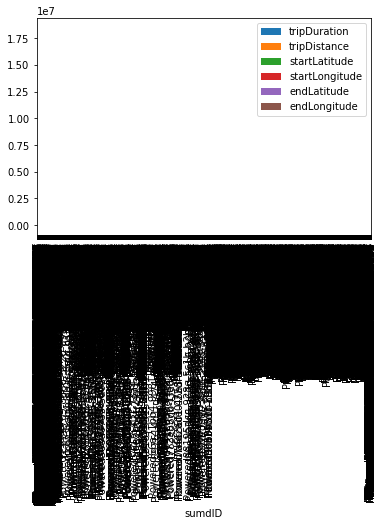

In [42]:
data5.groupby('sumdID').mean().plot(kind='bar')

In [43]:
data5.groupby('sumdID').mean()

,tripDuration,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude
sumdID,,,,,,
Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,1478.205128,9506.781026,36.155750,-86.786637,36.151356,-86.789341
Powered-01a24436-0315-e1bb-7ce0-d081d05dff7d,1286.115385,7346.683846,36.158175,-86.790901,36.158585,-86.789941
Powered-03be23ca-d43b-222f-be54-e44b5b4690df,922.621622,6044.813514,36.155966,-86.781226,36.156098,-86.780827
Powered-046201fb-6532-1f37-6334-3612fb1e61f7,901.864865,5536.551081,36.158835,-86.782345,36.159683,-86.782680
Powered-0479bb84-afbd-0426-f1c4-df628542a88c,1058.571429,5709.465306,36.163997,-86.776196,36.164681,-86.775340
Powered-0540c92c-0907-dafa-b19f-011495068ec5,1710.235294,9830.651176,36.155026,-86.785851,36.156497,-86.785861
Powered-0555d61d-1c59-4219-edf3-0f00e286629a,1227.875000,7470.677500,36.158591,-86.782769,36.158812,-86.785245
Powered-058d0498-dac4-437f-5a45-c951da4040a2,1684.914286,8434.945714,36.153764,-86.794455,36.154680,-86.793840
Powered-05fedb39-a00f-a5e0-2219-8c3c7dd1b80e,1677.281250,11506.007812,36.155127,-86.784896,36.156404,-86.786030


In [46]:
data5['day'] = data5.pubTimeStamp.dt.day

In [48]:
data5.loc[data5.sumdID == 'PoweredMDAQYMTPMLQL2' ]
data6 = data5.loc[data5.sumdID == 'PoweredMDAQYMTPMLQL2' ]
data6.groupby(data6.pubTimeStamp.dt.day).count()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,day
pubTimeStamp,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [51]:
data6.groupby(data6.pubTimeStamp.dt.day).count()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,day
pubTimeStamp,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [58]:
data6.groupby('sumdID','pubTimeStamp').count()
data6.head()

ValueError: No axis named pubTimeStamp for object type <class 'type'>

In [61]:
data6.columns('companyName')

TypeError: 'Index' object is not callable

In [62]:
columns('companyName')

NameError: name 'columns' is not defined

In [63]:
list(trip_data_june.companyName.unique())

['Bird', 'Gotcha', 'SPIN', 'Bolt Mobility', 'Lime', 'Lyft', 'JUMP']